In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem

In [2]:
def func(x):
    assert len(x) == 2, "Input must be a 2-dimensional vector."
    x1, x2 = x[0], x[1]
    f = 0.1*x1**6 - 1.5*x1**4 + 5*x1**2 + 0.1*x2**4 + 3*x2**2 - 9*x2 + 0.5*x1*x2
    return f

In [3]:
prob = OptimizationProblem(nDim=2, bounds=[(-3.5,3.5), (0,3)])
prob.setObjectiveFunction(func)
history = prob.solve(x0=[-1.5, 0.1], directionMethod='steepest_descent', stepMethod='backtracking', options={'maxIter':500, 'tol':1e-6})

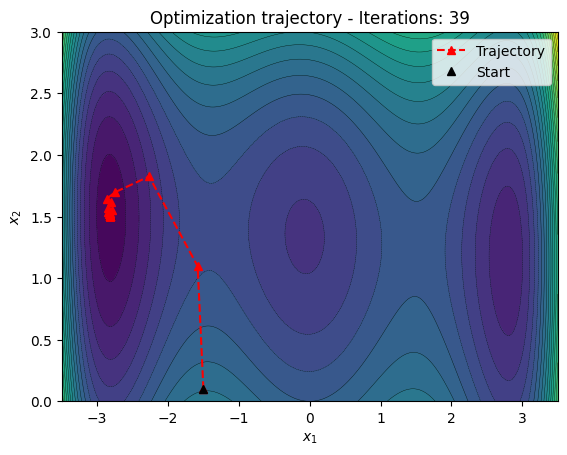

In [4]:
prob.plotSolutionHistory(history)